# Decision Tree for Diabetic Data
## _Author(s): Wai Yuen (Wylliam) Cheng_

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The data that would be used for our model was preprocessed and narrowed down to 1000 genes with one phenotype (positive/negative diabetes)

In [21]:
data = pd.read_csv("../WEKA-DATA/human-diabete-gene-expression-1000-gene.csv", sep=',', index_col=0)
data

,C17orf77,DBNDD1,ACTRT3,LINC01186,RASSF2,ANLN,EGR3,PLEKHH2,RABL2A///RABL2B,FRAS1,...,ALDOA,GIGYF2,CNTN6,CRACR2A,TTC23,LOC728095,LOC100508408///SNORD14B///RPS13,TUBAL3,KLRB1,diabete
GSM624925,4.035624,9.150255,6.556123,10.072669,10.007027,6.342970,9.133399,9.172927,9.364175,8.273843,...,16.750878,10.718825,8.019035,8.630085,8.802872,9.769838,16.966662,8.747522,10.047669,0
GSM624926,4.472488,8.211888,5.646739,9.525521,9.414685,8.185004,8.113742,6.556123,8.938863,8.756209,...,17.405859,10.780595,7.351381,8.769838,6.485251,9.143128,17.490713,7.685099,8.962896,0
GSM624927,8.020147,7.452035,7.187847,10.053383,9.772315,7.255027,8.399171,9.067703,8.469492,9.274486,...,17.219523,10.572338,7.701826,8.830040,7.452646,9.003939,17.358984,8.867896,9.319221,0
GSM624928,5.904484,10.405461,6.456149,10.145677,9.339627,7.552110,7.719047,7.179909,8.713437,9.186420,...,17.040513,10.292400,8.730640,8.879890,8.186024,9.774622,17.293693,8.090642,9.278449,0
GSM624929,5.364572,8.071462,7.099085,10.097505,10.097505,5.950188,7.580447,6.402586,8.966771,8.687073,...,17.217622,10.515013,5.911692,8.140574,7.981006,6.141596,17.432329,8.852373,8.743825,0
GSM624930,5.765535,9.053383,6.091700,10.314583,10.021119,8.838790,8.259743,8.881114,6.810688,8.398368,...,17.285510,10.565196,8.770829,9.079485,7.465594,9.766032,17.414977,8.992655,8.625709,0
GSM624931,5.963474,9.747689,6.149747,9.632632,9.699399,6.236472,8.704595,8.322829,8.646100,8.164323,...,17.016739,10.568603,8.572890,8.586089,8.480304,8.853933,17.274254,6.862947,8.574404,0
GSM624932,8.356672,8.308339,8.197217,9.654278,9.191800,6.263201,9.239121,8.168923,8.429889,9.270701,...,17.615950,10.395175,6.786596,9.228578,8.841852,9.417009,17.661136,8.508191,9.332484,0
GSM624933,5.965784,9.601771,7.155830,9.849405,10.296228,6.781360,7.661065,8.347843,8.952444,9.057806,...,17.372068,10.487739,5.930737,9.326654,7.734592,9.427103,17.471586,7.941928,9.360628,0
GSM624934,6.427941,10.268542,6.232661,9.574783,10.126963,8.046182,9.059885,8.272863,8.977748,8.873744,...,16.894595,10.602935,6.338068,9.314470,7.392014,9.209697,17.192975,9.590213,8.998590,0


## Data Loading

In [22]:
X = data.drop(columns=["diabete"]).to_numpy()
y = data["diabete"]

## Data Preprocessing

In [23]:
# 1 = positive
# 0 = negative

positive_x = []
positive_y = []
negative_x = []
negative_y = []
for i in range(len(X)):
    if y[i] == 1:
        positive_x.append(X[i])
        positive_y.append(y[i])
    else:
        negative_x.append(X[i])
        negative_y.append(y[i])

print(f"Negative Size: {len(negative_x)}")
print(f"Positive Size: {len(positive_x)}")

Negative Size: 40
Positive Size: 10


/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_1214/1655526027.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if y[i] == 1:
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_1214/1655526027.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  negative_y.append(y[i])
/var/folders/j9/4hvlltj95999sl1bmvdvgv7c0000gn/T/ipykernel_1214/1655526027.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  positive_y.appe

In [24]:
from sklearn.model_selection import train_test_split

positive_x_train, positive_x_test, positive_y_train, positive_y_test = train_test_split(positive_x, positive_y, test_size=.2)
negative_x_train, negative_x_test, negative_y_train, negative_y_test = train_test_split(negative_x, negative_y, test_size=.8)


train_x = np.concatenate([positive_x_train, negative_x_train])
train_y = np.concatenate([positive_y_train, negative_y_train])

test_x = np.concatenate([positive_x_test, negative_x_test])
test_y = np.concatenate([positive_y_test, negative_y_test])

In [25]:
## Standardize

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(train_x)

train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree(x_train: np.array, y_train: np.array) -> DecisionTreeClassifier:
    decision_tree = DecisionTreeClassifier()
    decision_tree.fit(x_train, y_train)
    return decision_tree
tree_model = decision_tree(train_x, train_y)
print("Accuracy of tree:", tree_model.score(test_x, test_y))

Accuracy of tree: 0.5


[Text(0.5, 0.75, 'BBS5 <= 0.325\ngini = 0.5\nsamples = 16\nvalue = [8, 8]\nclass = negative'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]\nclass = negative'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = positive'),
 Text(0.625, 0.5, '  False')]

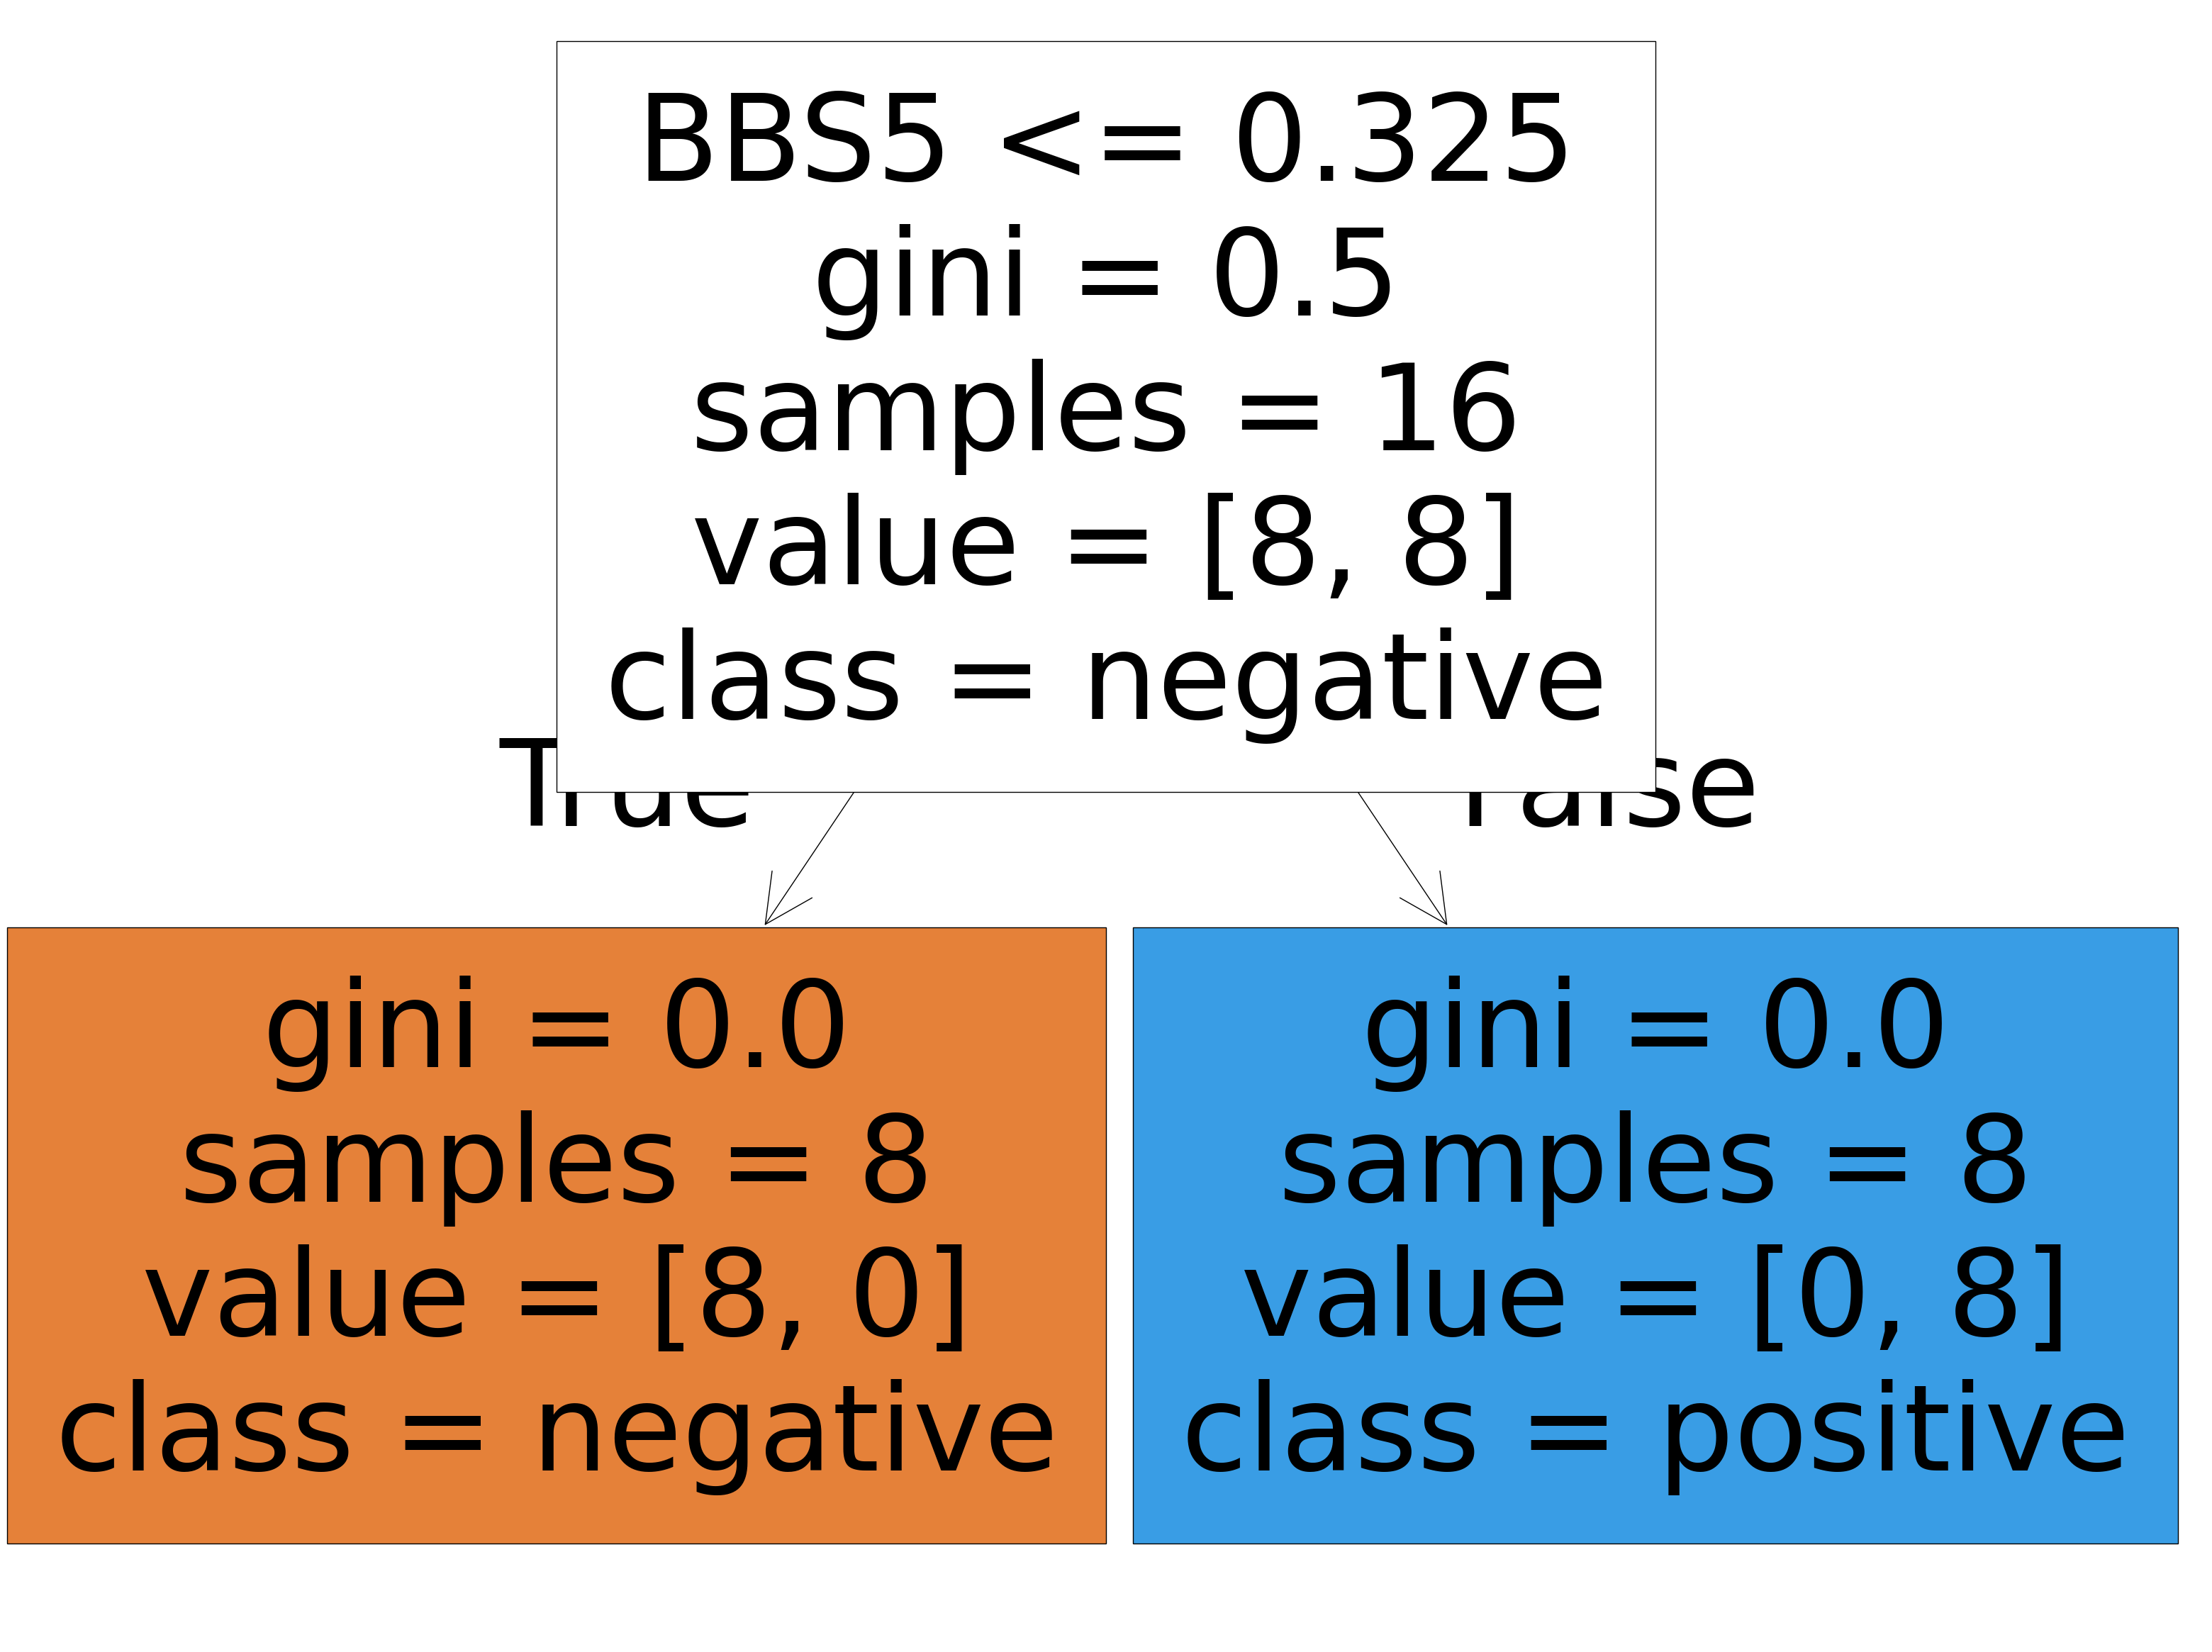

In [27]:
from sklearn import tree
fig = plt.figure(figsize=(40,30))
tree.plot_tree(tree_model,
              feature_names=list(data.drop(columns=["diabete"]).columns),
              class_names=["negative", "positive"],
              filled=True)

In [28]:
from sklearn.model_selection import cross_val_score

def cross_validate(x: np.ndarray, y: np.ndarray, k: int) -> float:
    model = DecisionTreeClassifier()
    return np.average(cross_val_score(model, x, y, cv=k))

print(f"Average score from cross validation: {cross_validate(X, y, 10)}")

Average score from cross validation: 0.8800000000000001
